In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,lfilter,filtfilt,spectrogram
import IPython
from IPython.display import Audio

w=wavfile.read(filename=r"c:\Users\Valentin\Documents\wav\v2\Безымянный (3).wav")
w=w[1][:,0]
framerate=44100
duration=w.shape[0]/framerate

def plotspec(signal,ax=plt, **kwargs):
    plt.plot(np.fft.fftfreq(signal.size,d=1/framerate), np.abs(np.fft.fft(signal)),**kwargs)

def showsig(signal):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plotspec(signal)
    plt.xlim([0, 1000])
    plt.subplot(122)
    plt.plot(np.linspace(0,len(signal)/framerate, len(signal),endpoint=False),signal)
    plt.show()
    IPython.display.display(    Audio(data=signal,rate=framerate))

## Pure tone

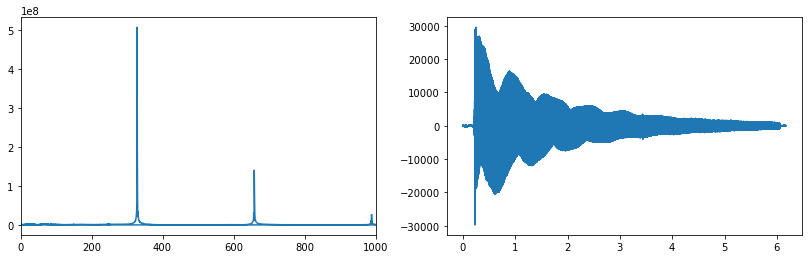

In [189]:
pure=w[128000:400000]
showsig(pure)

## Vibrato

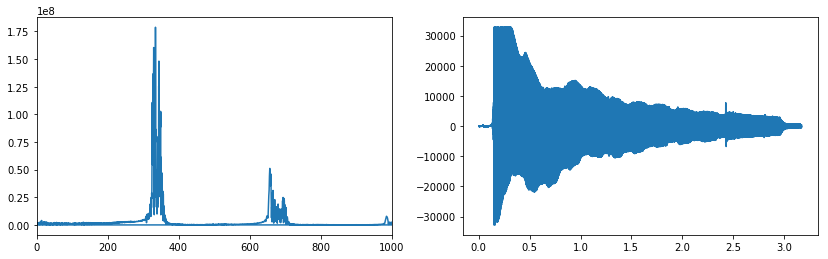

In [3]:
vibrato=w[630000:770000]
showsig(vibrato)

## Comparison

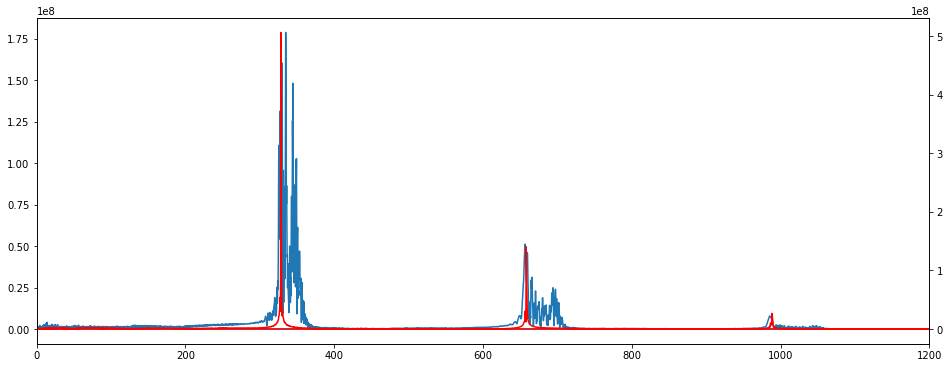

In [192]:
plt.figure(figsize=(16,6))
a=plt.gca()

plotspec(vibrato,a)
a2=a.twinx()
plotspec(pure,a2,c='r')
plt.xlim([0, 1200])

plt.show()

# plotspec(vibrato)
# plotspec(pure)
# plt.show()

## Pure tone spectrogram

(751,) (2706,)


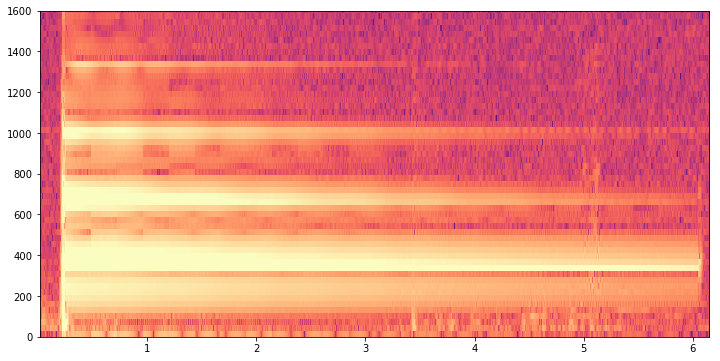

In [150]:
f,t,s=spectrogram(pure,fs=framerate,nperseg=1500, noverlap=1400)
print(f.shape,t.shape)
s=np.log(s)
plt.figure(figsize=(12,6))
plt.imshow(s,extent=[min(t),max(t),min(f),max(f)],origin='xy',aspect='auto', vmax=10, vmin=-18, cmap='magma')
plt.ylim(0,1600)
plt.show()

## Vibrato spectrogram

(751,) (1386,)


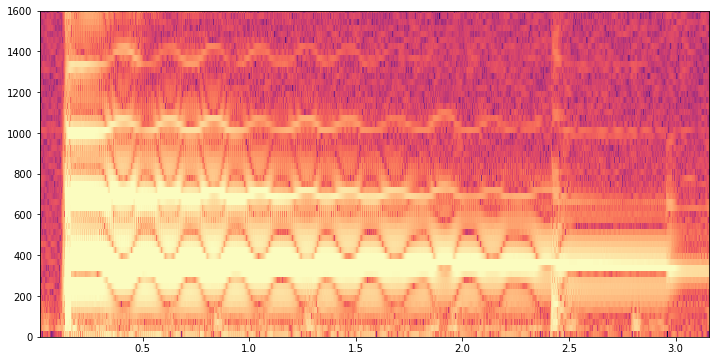

In [149]:
f,t,s=spectrogram(vibrato,fs=framerate,nperseg=1500, noverlap=1400)
print(f.shape,t.shape)
s=np.log(s)
plt.figure(figsize=(12,6))
plt.imshow(s,extent=[min(t),max(t),min(f),max(f)],origin='xy',aspect='auto', vmax=10, vmin=-18, cmap='magma')
plt.ylim(0,1600)
plt.show()